# Индивидуальное задание
Применение четырех методов для обнаружения контуров.
1. оператор Собеля
2. оператор Робертса
3. оператор Лапласа
4. алгоритм Кэнни

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('bskpl.jpg', 0)

Применение оператора Собеля для обнаружения контуров

In [3]:
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobelx, sobely)

Применение оператора Робертса для обнаружения контуров

In [4]:
ImageCopy = image.copy()

In [5]:
kernel_x = np.array([[1, 0], [0, -1]])
kernel_y = np.array([[0, 1], [-1, 0]])
gradient_x = cv2.filter2D(ImageCopy, cv2.CV_64F, kernel_x)
gradient_y = cv2.filter2D(ImageCopy, cv2.CV_64F, kernel_y)

In [6]:
gradient_abs = np.abs(gradient_x) + np.abs(gradient_y)
gradient_abs = np.uint8(gradient_abs)

In [7]:
threshold = 50
ret, roberts = cv2.threshold(gradient_abs, threshold, 255, cv2.THRESH_BINARY)

Применение оператора Лапласа для обнаружения контуров

In [8]:
laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)

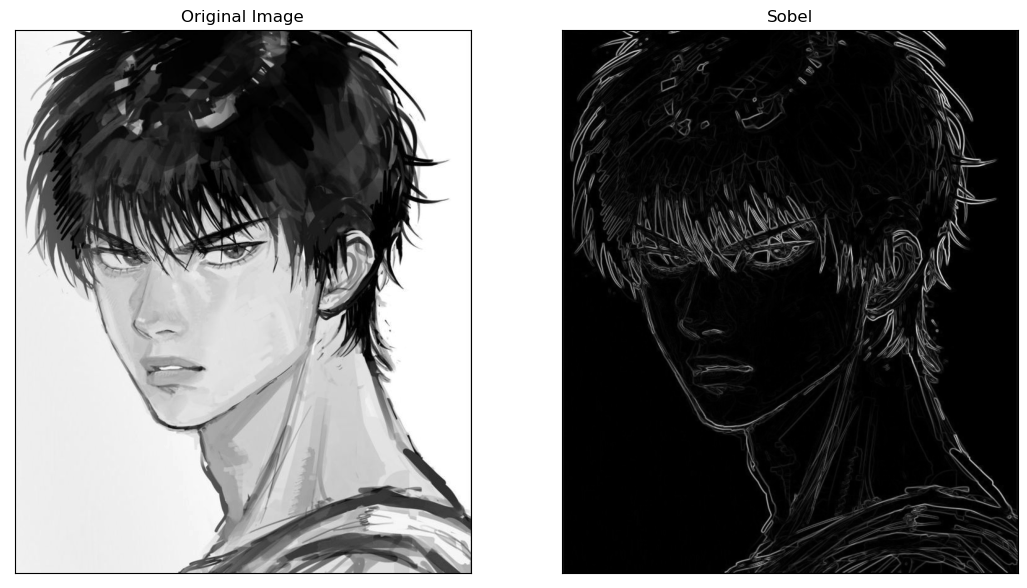

In [9]:
plt.figure(figsize=(20,20))
plt.subplot(132), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([]);

plt.show()

In [11]:
canny_edges = cv2.Canny(image,700,100,apertureSize = 3) 

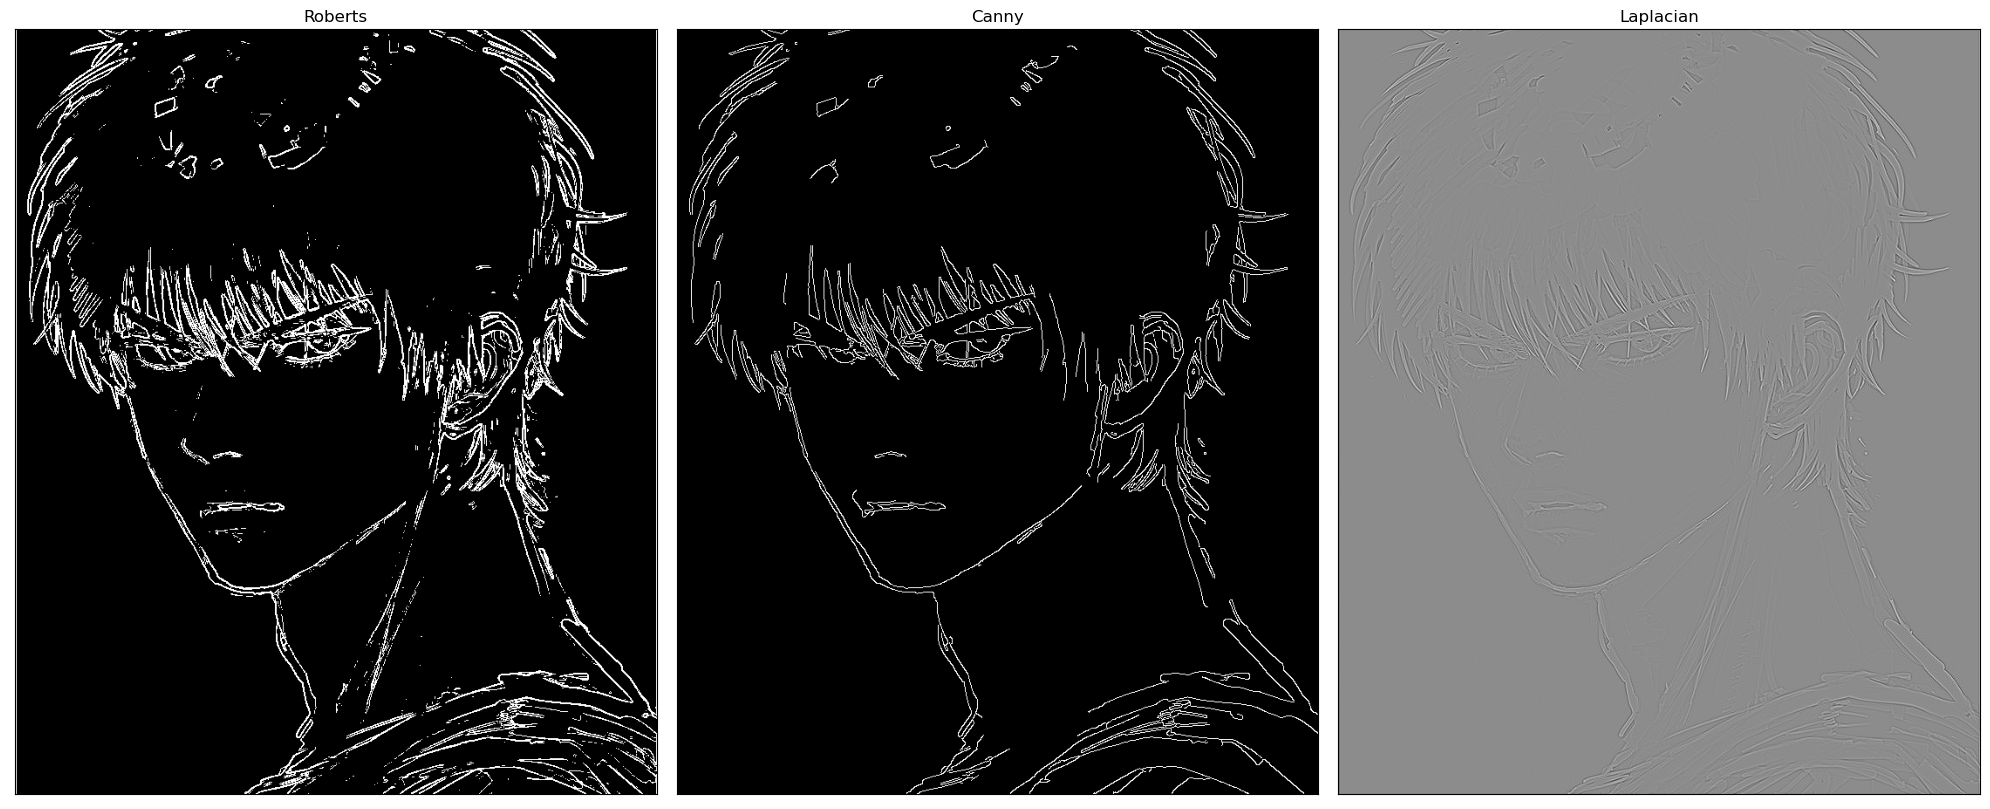

In [12]:
plt.figure(figsize=(20,20))

plt.subplot(131), plt.imshow(roberts, cmap='gray')
plt.title('Roberts'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(canny_edges, cmap='gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([]);

plt.tight_layout()
plt.show()